<a href="https://colab.research.google.com/github/DmitryKutsev/ml_hw/blob/master/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# https://github.com/mannefedov/hse_ml_m1/blob/master/6_nn_intro/nn_intro.ipynb
# https://docs.google.com/forms/d/e/1FAIpQLSdbdl9DMhqlwgAtxro-cewafRyCq_liHFByCksRWBZsRlIKWA/viewform

from google.colab import drive
drive.mount('/content/drive')

!unzip '/content/drive/My Drive/data.zip'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Archive:  /content/drive/My Drive/data.zip
  inflating: avito_data.csv          
  inflating: quora.csv               
  inflating: __MACOSX/._quora.csv    


In [1]:
!pip install pandas scikit-learn gensim matplotlib


In [0]:
import tensorflow as tf

In [0]:
import pandas as pd
import numpy as np
from string import punctuation
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
import gensim
%matplotlib inline

In [0]:
# avito = pd.read_csv('avito_data.csv').dropna()
# !unzip '/content/drive/My Drive/data.zip'

In [0]:
def preprocess(text):
    tokens = text.lower().split()
    tokens = [token.strip(punctuation) for token in tokens]
    return tokens

In [0]:
from sklearn.metrics import classification_report

In [0]:
#конкатенация в один эмбеддинг

In [0]:
quora = pd.read_csv('quora.csv')

In [0]:
vocab = Counter()

for text in quora.question_text:
    vocab.update(preprocess(text))

In [0]:
filtered_vocab = set()

for word in vocab:
    if vocab[word] > 50:
        filtered_vocab.add(word)

In [0]:
word2id = {'UNK':1, 'PAD':0}

for word in filtered_vocab:
    word2id[word] = len(word2id)

In [0]:
id2word = {i:word for word, i in word2id.items()}

In [0]:
# переводим тексты в последовательности индексов
X = []

for text in quora.question_text:
    tokens = preprocess(text)
    ids = [word2id.get(token, 1) for token in tokens]
    X.append(ids)

In [0]:
MAX_LEN = max(len(x) for x in X)

In [0]:
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen=MAX_LEN)

In [0]:
y = quora.target.values

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05)

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=len(word2id),
                                      input_length=MAX_LEN, output_dim=100)) 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=1024,
         epochs=5)

Epoch 1/5
1212/1212 [==============================] - 102s 84ms/step - loss: 0.1270 - accuracy: 0.9515 - val_loss: 0.1155 - val_accuracy: 0.9545
Epoch 2/5
1212/1212 [==============================] - 103s 85ms/step - loss: 0.1061 - accuracy: 0.9570 - val_loss: 0.1166 - val_accuracy: 0.9551
Epoch 3/5
1212/1212 [==============================] - 102s 84ms/step - loss: 0.0927 - accuracy: 0.9623 - val_loss: 0.1250 - val_accuracy: 0.9527
Epoch 4/5
1212/1212 [==============================] - 102s 84ms/step - loss: 0.0752 - accuracy: 0.9700 - val_loss: 0.1410 - val_accuracy: 0.9494
Epoch 5/5
1212/1212 [==============================] - 102s 85ms/step - loss: 0.0603 - accuracy: 0.9762 - val_loss: 0.1676 - val_accuracy: 0.9488


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


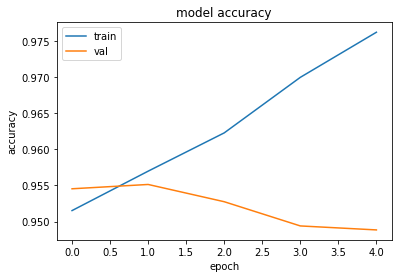

In [24]:
print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import classification_report

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [27]:
# можно подбирать порог для отнесения к токсичному классу
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     61266
           1       0.60      0.52      0.56      4041

    accuracy                           0.95     65307
   macro avg       0.78      0.75      0.76     65307
weighted avg       0.95      0.95      0.95     65307



In [0]:
#Усреднение

In [0]:
inputs = tf.keras.layers.Input(shape=(MAX_LEN,))

embeddings = tf.keras.layers.Embedding(input_dim=len(word2id), output_dim=100)(inputs, )
mean = tf.keras.layers.Flatten()(embeddings)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
dense = tf.keras.layers.Dense(64, activation='relu')(mean)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, 
          validation_data=(X_valid, y_valid),
          batch_size=1024,
         epochs=5)

Epoch 1/5
1212/1212 [==============================] - 103s 85ms/step - loss: 0.1664 - accuracy: 0.9418 - val_loss: 0.1308 - val_accuracy: 0.9499
Epoch 2/5
1212/1212 [==============================] - 102s 84ms/step - loss: 0.1197 - accuracy: 0.9521 - val_loss: 0.1192 - val_accuracy: 0.9538
Epoch 3/5
1212/1212 [==============================] - 101s 84ms/step - loss: 0.1116 - accuracy: 0.9548 - val_loss: 0.1165 - val_accuracy: 0.9548
Epoch 4/5
1212/1212 [==============================] - 106s 88ms/step - loss: 0.1077 - accuracy: 0.9561 - val_loss: 0.1176 - val_accuracy: 0.9542
Epoch 5/5
1212/1212 [==============================] - 101s 84ms/step - loss: 0.1050 - accuracy: 0.9570 - val_loss: 0.1160 - val_accuracy: 0.9551


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


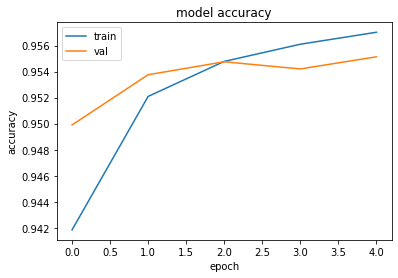

In [32]:

print(model.history.history.keys())
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_valid).reshape(-1)

In [34]:
print(classification_report(y_valid, (preds > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     61266
           1       0.67      0.55      0.60      4041

    accuracy                           0.96     65307
   macro avg       0.82      0.76      0.79     65307
weighted avg       0.95      0.96      0.95     65307



In [0]:
#сложение

In [0]:
#вект

In [0]:
texts = quora.question_text.apply(preprocess).tolist()

In [0]:
ft = gensim.models.FastText(texts, size=100, iter=2)

In [0]:
ft2 = gensim.models.FastText(texts, window=3,  size=100, iter=4)

In [42]:
ft.most_similar('wiki')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wiz', 0.8618590831756592),
 ('wi', 0.8361142873764038),
 ('wi-fi', 0.8300323486328125),
 ('wih', 0.8275600075721741),
 ('wig', 0.8142218589782715),
 ('wix', 0.7989658117294312),
 ('winfrey', 0.7854574918746948),
 ('wiil', 0.7844014167785645),
 ('wimp', 0.7825563549995422),
 ('windy', 0.7776259183883667)]

In [43]:
weights = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    # вектор паддинга оставим нулевым
    if word == 'PAD':
        continue
    
    # для UNK будем использовать какой-то рандомный вектор
    if word == 'UNK':
        weights[i] = ft['какоераоваыпаопрвлоа']
    
    try:
        weights[i] = ft[word]
    
    
    except KeyError:
        # для слов, которых нет в модели тоже возьмем какой-то  рандомный вектор
        weights[i] = ft['опрагпллирао']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [44]:
weights2 = np.zeros((len(word2id), 100))

for word, i in word2id.items():
    # вектор паддинга оставим нулевым
    if word == 'PAD':
        continue
    
    # для UNK будем использовать какой-то рандомный вектор
    if word == 'UNK':
        weights2[i] = ft2['какоераоваыпаопрвлоа']
    
    try:
        weights2[i] = ft2[word]
    
    
    except KeyError:
        # для слов, которых нет в модели тоже возьмем какой-то  рандомный вектор
        weights[i] = ft2['опрагпллирао']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
